Arbitrary Value Imputation

it consists of replacing NAN by a arbitrary value

it should be frequently  present

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
def inpute_nan(df,variable):
  #  df[variable+'_zero']=df[variable].fillna(0)
  df[variable+'_hundred']=df[variable].fillna(100)

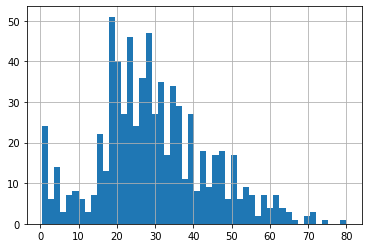

In [5]:
df['Age'].hist(bins=50)

# **Categorical features**

In [6]:
df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [7]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [8]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [9]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [10]:
df.shape

(1460, 4)

**Compute the frequency with every feature**

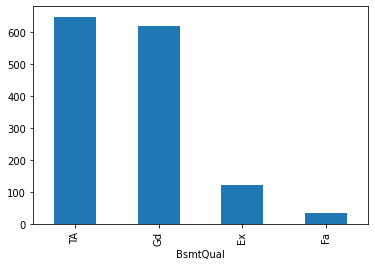

In [11]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

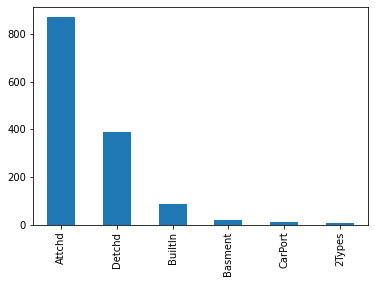

In [12]:
df['GarageType'].value_counts().plot.bar()

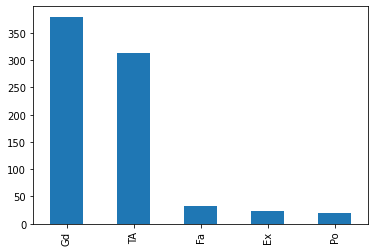

In [13]:
df['FireplaceQu'].value_counts().plot.bar()

In [14]:
def inpute_nan(df,variable):
  most_frequent_category=df[variable].value_counts().index[0]
  df[variable].fillna(most_frequent_category,inplace=True)

In [15]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [16]:
#to get the feature having maximum value counts
df['GarageType'].mode()[0]

'Attchd'

In [17]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
  inpute_nan(df,features)

In [19]:
df.isnull().mean()
#distorts the dataset if it has very high null values

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

**Advantages**

1.easy to implement
2.faster way to implement

**Disadvantages**

1.since we are using the more frequent labels,it may use them in over represented way ,if there are many NAN values

2.it distorts the relation of the most frequent label


# **Adding a variable to capture NAN**

In [41]:
df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [42]:
import numpy as np
df['BsmtQual_val']=np.where(df['BsmtQual'].isnull(),1,0)

In [43]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_val
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [44]:
df.isnull().sum()

BsmtQual         37
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_val      0
dtype: int64

In [45]:
frequent=df['BsmtQual'].mode()[0]

In [46]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [47]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_val
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [48]:
df['FireplaceQu_val']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [49]:
df.head()
#disadvantage creating more features

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_val,FireplaceQu_val
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


Suppose if you have more frequent categories, we just replace NAN with a new category

In [63]:
df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [64]:
def impute_nan(df,variable):
  df[variable+'newvar']=np.where(df[variable].isnull(),"missing",df[variable])

In [65]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,features)

In [66]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [67]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [68]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# **Handle Categorical Features**
# One Hot Encoding

In [71]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])

In [72]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [76]:
pd.get_dummies(df,drop_first=True).head()
#i can just take one feature and discard the other

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [77]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])

In [79]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [80]:
df.dropna(inplace=True)

In [81]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### Onehotencoding with many categories in a feature

In [106]:
df=pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [107]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [108]:
df.isnull().sum()

X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [109]:
#number of features for each column
for i in df.columns:
  print(len(df[i].unique()))

47
27
44
7
4
29
12


In [110]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [111]:
df['X1'].value_counts()

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

In [112]:
#taking top 10 features-KDD cup challenge as top 10 is occupying most of the categories
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [113]:
lst_10 #10 most frequent categories and apply one hot encoding

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [114]:
for categories in lst_10:
  df[categories]=np.where(df['X1']==categories,1,0)


In [115]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,0,1,0,0,0,0,0
4207,0,0,0,0,0,1,0,0,0,0


In [116]:
lst_10.append('X1')


In [117]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
